Deep Learning in Data Science: **Detect COVID-19 using transfer learning**

Data är 377 bilder från Covid-repot (men det är inte bara Covid-sjuka lungor utan andra sjukdomar förekommer, jag kan ta bort) och 377 bilder på normal lungor från Kaggle repot

https://github.com/ieee8023/covid-chestxray-dataset

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia/data

Se följande sidor för tillämpning

https://github.com/HarshCasper/Brihaspati/blob/master/COVID-19/COVID19-XRay.ipynb

https://www.kaggle.com/iamprateek/covid-19-prediction-xray

https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/


In [2]:
from keras import applications
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
batch_size = 64
img_height, img_width = 224, 224

dir = "/content/drive/My Drive/with_box/"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=[0.8, 0.85],
    horizontal_flip=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [0]:
x_batch, y_batch = next(train_generator)
for i in range (0,20):
    image = x_batch[i]
    plt.figure()
    plt.imshow(x_batch[i])
    print(y_batch[i])

Output hidden; open in https://colab.research.google.com to view.

Epoch 1/25
3/3 [==============================] - 131s 44s/step - loss: 1.7584 - accuracy: 0.4000 - val_loss: 0.6148 - val_accuracy: 0.6719
Epoch 2/25
3/3 [==============================] - 114s 38s/step - loss: 0.6456 - accuracy: 0.6458 - val_loss: 0.6112 - val_accuracy: 0.6522
Epoch 3/25
3/3 [==============================] - 107s 36s/step - loss: 0.6277 - accuracy: 0.6071 - val_loss: 0.5619 - val_accuracy: 0.6719
Epoch 4/25
3/3 [==============================] - 89s 30s/step - loss: 0.7987 - accuracy: 0.5929 - val_loss: 0.5650 - val_accuracy: 0.6522
Epoch 5/25
3/3 [==============================] - 101s 34s/step - loss: 0.5341 - accuracy: 0.7357 - val_loss: 0.5646 - val_accuracy: 0.7031
Epoch 6/25
3/3 [==============================] - 90s 30s/step - loss: 0.5908 - accuracy: 0.6643 - val_loss: 0.6574 - val_accuracy: 0.5652
Epoch 7/25
3/3 [==============================] - 132s 44s/step - loss: 0.5867 - accuracy: 0.7083 - val_loss: 0.5115 - val_accuracy: 0.7031
Epoch 8/25
3/3 [======

Text(0, 0.5, 'loss and accuracy')

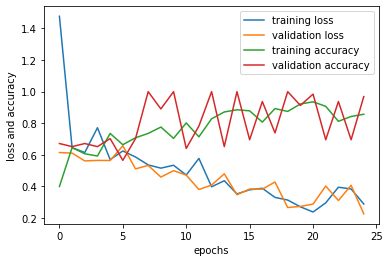

In [0]:
nb_epochs = 25

model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # VGG16 without the fully connected layers
#model_vgg = applications.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # ResNet50 without the fully connected layers

for layer in model_vgg.layers:
  layer.trainable = False # don't train these

model_fc = Sequential()
model_fc.add(Flatten(input_shape=model_vgg.output_shape[1:])) # Flatten so that they fit
model_fc.add(Dense(128, activation='relu')) # new fc layer
model_fc.add(Dropout(0.25))
model_fc.add(Dense(1, activation='sigmoid')) # prediction layer

model = Model(inputs=model_vgg.input, outputs=model_fc(model_vgg.output)) # merges them

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy']) # I chose SGD becaues it's seemed to be the most easy to understand optimizer

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')
# about the warning https://stackoverflow.com/questions/58446290/userwarning-an-input-could-not-be-retrieved-it-could-be-because-a-worker-has

Found 2 images belonging to 1 classes.


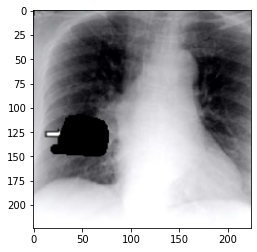

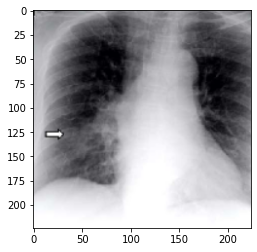

In [0]:
dir_pred = "/content/drive/My Drive/test_cover/"

predict_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=[0.8, 0.8],
    horizontal_flip=False)

predict_generator = predict_datagen.flow_from_directory(
    dir_pred,
    target_size=(img_height, img_width))

x, y = next(predict_generator)
image = x[0]
plt.figure()
plt.imshow(image)
image = x[1]
plt.figure()
plt.imshow(image)

In [0]:
prediction = model.predict(x)
print(prediction)

[[0.34131262]
 [0.3882215 ]]


In [0]:
model.save_weights(filepath='/content/drive/My Drive/DD2424 Project/final_weight_monochrome.txt')

In [0]:
dir_evaluate = "/content/drive/My Drive/DD2424 Project/Dataset/cov-19_filtered_bw/"

ev_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=[0.8, 0.85],
    horizontal_flip=True) # set validation split

ev_generator = ev_datagen.flow_from_directory(
    dir_evaluate,
    target_size=(img_height, img_width),
    batch_size=291,
    class_mode='binary')

model.evaluate_generator(ev_generator)

Found 291 images belonging to 2 classes.


[0.4278751611709595, 0.975944995880127]

In [0]:
import imageio
margin = 20
index = 0
x, y = next(ev_generator)
for image in x:
  for i in range(margin, 224-margin):
    for j in range(margin, 224-margin):
      image[i, j, :] = np.random.uniform()
  index += 1
  print(index)
  imageio.imwrite("/content/drive/My Drive/with_box/" + str(index) + ".jpg", image)

1


2
3


4
5


6
7


8
9


10
11


12


13
14


15
16


17
18


19
20


21
22


23
24


25
26


27
28


29
30


31
32


33
34


35
36


37
38


39
40


41
42


43
44


45
46


47
48


49
50


51
52


53
54


55
56


57
58


59
60


61
62


63
64


65
66


67
68


69
70


71
72


73
74


75
76


77
78


79
80


81
82


83
84


85
86


87
88


89
90


91
92


93
94


95
96


97
98


99
100


101
102


103
104


105
106


107
108


109
110


111
112


113
114


115
116


117
118


119
120


121
122


123
124


125
126


127
128


129
130


131
132


133
134


135
136


137
138


139
140


141
142


143
144


145
146


147
148


149
150


151
152


153
154


155
156


157
158


159
160


161
162


163
164


165
166


167
168


169
170


171
172


173
174


175
176


177
178


179
180


181
182


183
184


185
186


187
188


189
190


191
192


193
194


195
196


197
198


199
200


201
202


203
204


205
206


207
208


209
210


211
212


213
214


215
216


217
218


219
220


221
222


223
224


225
226


227
228


229
230


231
232


233
234


235
236


237
238


239
240


241
242


243
244


245
246


247
248


249
250


251
252


253
254


255
256


257
258


259
260


261
262


263
264


265
266


267
268


269
270


271
272


273
274


275
276


277
278


279
280


281
282


283
284


285
286


287
288


289
290


291


In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4098004647861302050, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3166005714168944204
 physical_device_desc: "device: XLA_CPU device"]